In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2022-11-20 12:04:24.141631: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import decode_predictions

In [5]:
train_dir = './train'
valid_dir = './test'

In [6]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False
)

Found 1594 images belonging to 2 classes.


In [7]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [8]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False
)

Found 394 images belonging to 2 classes.


In [9]:
val_ds.class_indices

{'dino': 0, 'dragon': 1}

In [10]:
def make_model(loss_name):

    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss=loss_name,\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['accuracy'])
    
    return model

## Q2 solution

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

## Q1 solution :  binary_crossentropy

## binary_crossentropy
Used as a loss function for binary classification model. The binary_crossentropy function computes the cross-entropy loss between true labels and predicted labels.

## categorical_crossentropy
Used as a loss function for multi-class classification model where there are two or more output labels. The output label is assigned one-hot category encoding value in form of 0s and 1. The output label, if present in integer form, is converted into categorical encoding using keras.utils to_categorical method.

## Focal Loss function
A Focal Loss function addresses class imbalance during training in tasks like object detection. Focal loss applies a modulating term to the cross entropy loss in order to focus learning on hard misclassified examples. It is a dynamically scaled cross entropy loss, where the scaling factor decays to zero as confidence in the correct class increases.

## Mean Square Error Loss
Mean Square Error Loss is also known a L2 regularization and is used for Regression tasks. It tells you how close a regression line is to a set of data points. It calculates the square difference between the current output and the expected output divided by the number of output

In [12]:
loss1=tf.keras.losses.BinaryCrossentropy()
loss2= tf.keras.losses.CategoricalCrossentropy(from_logits=True)

losses = {}

for lo in [loss1,loss2]:
    print(lo)

    model = make_model(loss_name=lo)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    losses[lo] = history.history


2022-11-20 12:04:58.950203: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 12:04:58.956863: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 12:04:58.957576: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 12:04:58.959527: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

Epoch 1/10


2022-11-20 12:05:01.419080: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-20 12:05:02.079641: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 12:05:02.080583: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 12:05:02.080619: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-20 12:05:02.081617: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 12:05:02.081703: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


80/80 [==============================] - 13s 126ms/step - loss: 0.7503 - accuracy: 0.5082 - val_loss: 0.6917 - val_accuracy: 0.4975
Epoch 2/10
80/80 [==============================] - 9s 110ms/step - loss: 0.6906 - accuracy: 0.5194 - val_loss: 0.6798 - val_accuracy: 0.5076
Epoch 3/10
80/80 [==============================] - 9s 110ms/step - loss: 0.6776 - accuracy: 0.5652 - val_loss: 0.6865 - val_accuracy: 0.4975
Epoch 4/10
80/80 [==============================] - 9s 112ms/step - loss: 0.6271 - accuracy: 0.6851 - val_loss: 0.5143 - val_accuracy: 0.8122
Epoch 5/10
80/80 [==============================] - 9s 109ms/step - loss: 0.5387 - accuracy: 0.7516 - val_loss: 0.4985 - val_accuracy: 0.7614
Epoch 6/10
80/80 [==============================] - 9s 111ms/step - loss: 0.4422 - accuracy: 0.8068 - val_loss: 0.4066 - val_accuracy: 0.8274
Epoch 7/10
80/80 [==============================] - 9s 111ms/step - loss: 0.3743 - accuracy: 0.8407 - val_loss: 0.6476 - val_accuracy: 0.6954
Epoch 8/10
80/80

/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


80/80 [==============================] - 9s 113ms/step - loss: nan - accuracy: 0.5113 - val_loss: nan - val_accuracy: 0.4975
Epoch 2/10
80/80 [==============================] - 9s 109ms/step - loss: nan - accuracy: 0.5188 - val_loss: nan - val_accuracy: 0.4975
Epoch 3/10
80/80 [==============================] - 9s 109ms/step - loss: nan - accuracy: 0.5188 - val_loss: nan - val_accuracy: 0.4975
Epoch 4/10
80/80 [==============================] - 9s 109ms/step - loss: nan - accuracy: 0.5188 - val_loss: nan - val_accuracy: 0.4975
Epoch 5/10
80/80 [==============================] - 9s 110ms/step - loss: nan - accuracy: 0.5188 - val_loss: nan - val_accuracy: 0.4975
Epoch 6/10
80/80 [==============================] - 9s 110ms/step - loss: nan - accuracy: 0.5188 - val_loss: nan - val_accuracy: 0.4975
Epoch 7/10
80/80 [==============================] - 9s 110ms/step - loss: nan - accuracy: 0.5188 - val_loss: nan - val_accuracy: 0.4975
Epoch 8/10
80/80 [==============================] - 9s 110m

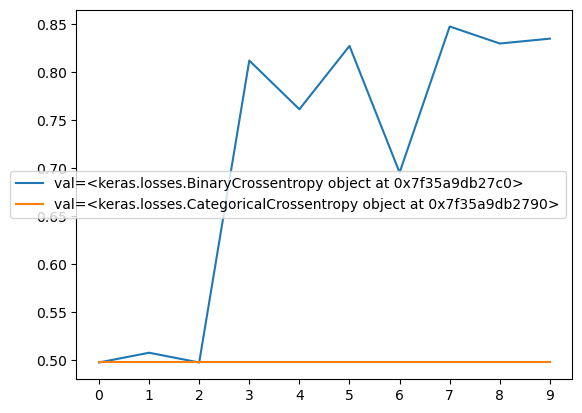

In [13]:
for lo, hist in losses.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % lo))
plt.xticks(np.arange(10))
plt.legend()

## Q3 Solution

In [22]:
train_gen = ImageDataGenerator(rescale=1./255)


train_ds = train_gen.flow_from_directory(
    './train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory(
    './test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['accuracy'])

In [24]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
80/80 [==============================] - 9s 108ms/step - loss: 0.6182 - accuracy: 0.6650 - val_loss: 0.5089 - val_accuracy: 0.7640
Epoch 2/10
80/80 [==============================] - 8s 106ms/step - loss: 0.4672 - accuracy: 0.7892 - val_loss: 0.4065 - val_accuracy: 0.8401
Epoch 3/10
80/80 [==============================] - 8s 105ms/step - loss: 0.3904 - accuracy: 0.8400 - val_loss: 0.4418 - val_accuracy: 0.7792
Epoch 4/10
80/80 [==============================] - 9s 106ms/step - loss: 0.3381 - accuracy: 0.8614 - val_loss: 0.3744 - val_accuracy: 0.8147
Epoch 5/10
80/80 [==============================] - 8s 105ms/step - loss: 0.2948 - accuracy: 0.8883 - val_loss: 0.3074 - val_accuracy: 0.8680
Epoch 6/10
80/80 [==============================] - 8s 106ms/step - loss: 0.2778 - accuracy: 0.8896 - val_loss: 0.3425 - val_accuracy: 0.8426
Epoch 7/10
80/80 [==============================] - 9s 106ms/step - loss: 0.2446 - accuracy: 0.9141 - val_loss: 0.2974 - val_accuracy: 0.8731
Epoch 

## Q3 solution

In [25]:
import statistics
statistics.median(history.history["accuracy"])

0.888958603143692

## Q4 Solution

In [26]:
statistics.stdev(history.history["loss"])

0.14166364885138927

In [37]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [38]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [39]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20, 
                                                    class_mode='binary',
                                                    shuffle=True
                                                    )

Found 1594 images belonging to 2 classes.


In [42]:
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True)

Found 394 images belonging to 2 classes.


In [46]:
model = make_model(loss_name=tf.keras.losses.BinaryCrossentropy())
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
80/80 [==============================] - 9s 108ms/step - loss: 0.6304 - accuracy: 0.6330 - val_loss: 0.5155 - val_accuracy: 0.7716
Epoch 2/10
80/80 [==============================] - 9s 106ms/step - loss: 0.4657 - accuracy: 0.7974 - val_loss: 0.4753 - val_accuracy: 0.7919
Epoch 3/10
80/80 [==============================] - 9s 107ms/step - loss: 0.3812 - accuracy: 0.8400 - val_loss: 0.3674 - val_accuracy: 0.8376
Epoch 4/10
80/80 [==============================] - 9s 106ms/step - loss: 0.3369 - accuracy: 0.8601 - val_loss: 0.3938 - val_accuracy: 0.8122
Epoch 5/10
80/80 [==============================] - 8s 105ms/step - loss: 0.3153 - accuracy: 0.8739 - val_loss: 0.3320 - val_accuracy: 0.8629
Epoch 6/10
80/80 [==============================] - 8s 105ms/step - loss: 0.2782 - accuracy: 0.8915 - val_loss: 0.3520 - val_accuracy: 0.8503
Epoch 7/10
80/80 [==============================] - 9s 106ms/step - loss: 0.2564 - accuracy: 0.9040 - val_loss: 0.3888 - val_accuracy: 0.8173
Epoch 

## Q5 Solution

In [49]:
statistics.mean(history.history["val_loss"])

0.37511796951293946

## Q6 Solution

In [59]:
history.history["val_accuracy"][5:]

[0.8502538204193115,
 0.817258894443512,
 0.8781725764274597,
 0.8451776504516602,
 0.8832487463951111]

In [60]:
statistics.mean(history.history["val_accuracy"][5:])

0.8548223376274109